IMPLEMENT WITH SKLEARN

In [ ]:
!gdown 1UjuHkxE8VSQOdklibKqZ72qodJLBynEv

Downloading...
From: https://drive.google.com/uc?id=1UjuHkxE8VSQOdklibKqZ72qodJLBynEv
To: /content/Walmart.csv
100% 364k/364k [00:00<00:00, 37.7MB/s]


In [ ]:
from IPython.display import clear_output

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# load data
data_df = pd.read_csv('Walmart.csv')
data_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data_y = data_df['Weekly_Sales'] # target
data_x = data_df.drop(['Weekly_Sales'], axis= 1) # input features

In [ ]:
# Take a rough observation
desc = data_x.describe()
desc

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
# encode different holidays
Super_Bowl = ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']
Labour_Day = ['10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013']
Thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']

Holidays = [Super_Bowl, Labour_Day, Thanksgiving, Christmas]

In [ ]:
Holiday_Flag=10 # 10 is better than 1
for holiday in Holidays:
  indices_to_update = data_x[data_x['Date'].isin(holiday)].index
  data_x.iloc[indices_to_update, 2] = Holiday_Flag
  Holiday_Flag+=1
data_x.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,10,38.51,2.548,211.242170,8.106
2,1,19-02-2010,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,0,46.50,2.625,211.350143,8.106


In [ ]:
'''
# another way to encode holidays (kind of one hot)
Super_Bowl = ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']
Labour_Day = ['10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013']
Thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']
Holidays_name=['Super_Bowl', 'Labour_Day', 'Thanksgiving', 'Christmas']
Holidays = [Super_Bowl, Labour_Day, Thanksgiving, Christmas]

for i,holiday in enumerate(Holidays):
  data_x[Holidays_name[i]] = 0
  indices_to_update = data_x[data_x['Date'].isin(holiday)].index
  data_x.loc[indices_to_update, Holidays_name[i]] = 1

data_x
'''

In [ ]:
info_interest = ["Store", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"] #"Store", "Holiday_Flag", "Temperature", "Fuel_Price", "CPI", "Unemployment"

In [ ]:
x = data_x[info_interest]

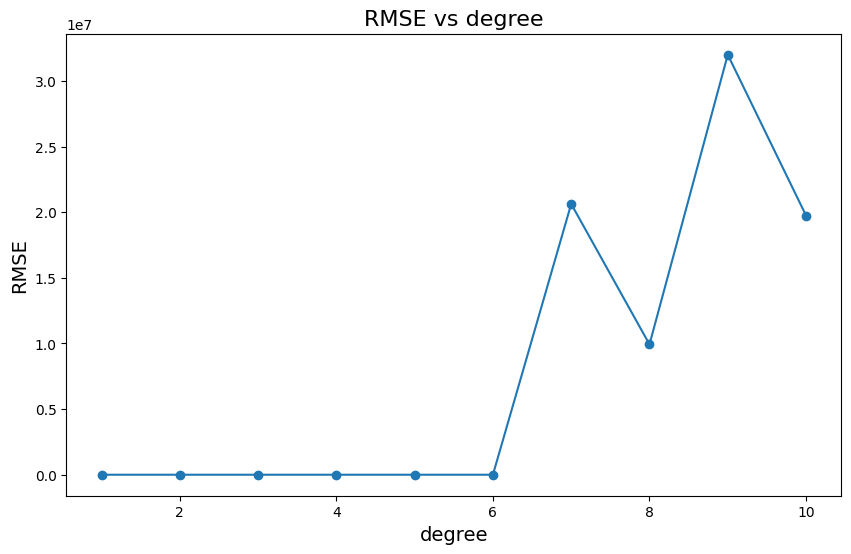

In [ ]:
# Find Polynomial degree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

test_degree = 10

degree = find_degree(x, data_y, test_degree)

In [ ]:
degree

4

In [ ]:
# Polynomial
x = data_x[info_interest]
poly = PolynomialFeatures(degree)
x = poly.fit_transform(x)

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
# in real application, y should not be normalized
y=data_y.to_numpy()
y_max = np.max(y)
y_min = np.min(y)
y = (y-y_min)/(y_max-y_min)

In [ ]:
# split 8:2
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.08489486881809837
Root Mean Squared Error (RMSE): 0.10934674645723276


In [ ]:
y_pred

array([0.24536056, 0.2681743 , 0.29979588, ..., 0.11090097, 0.36115853,
       0.30661158])

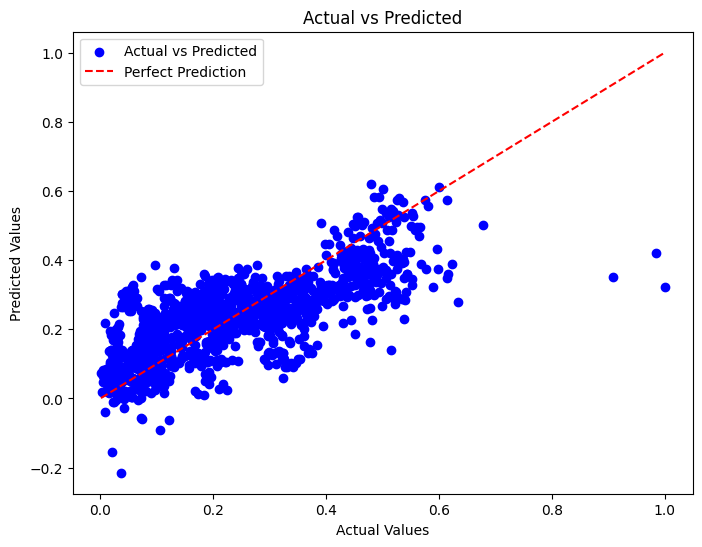

In [ ]:
# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


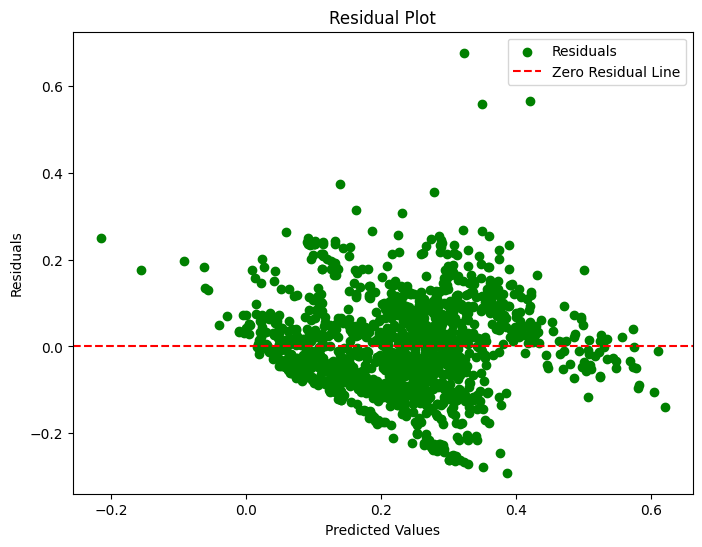

In [ ]:
# Residual plot
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()


IMPLEMENT FROM SCRATCH

In [ ]:
x = data_x[info_interest].to_numpy()

In [ ]:
# polynomial
x = generate_polynomial_features(x, degree)

In [ ]:
x.shape

(6435, 209)

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
y=data_y.to_numpy()
y_max = np.max(y)
y_min = np.min(y)
y = (y-y_min)/(y_max-y_min)

In [ ]:
# split 8:2
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# add bias
new_train_x = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
new_test_x = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
# theta = (X^T * X)^(-1) * X^T * y
theta = np.linalg.inv(new_train_x.T @ new_train_x) @ new_train_x.T @ y_train

print("theta:", theta)

# predict
y_pred = new_test_x @ theta

theta: [ 1.25180746e+00 -2.57321095e+02  1.94005732e+02  2.91964223e+01
  3.78519138e+01  2.08307302e+02  4.86868852e+01  6.52121571e+01
  2.44920181e+00  3.25878070e+01 -5.93077216e+01  7.94312492e+02
  1.11774823e+02 -6.33302364e+02 -1.62131597e+01 -1.44995732e+01
 -1.22253089e+01  9.14688720e+00 -1.48077747e+01 -4.10065443e+01
 -7.74413541e+01  3.53153540e+00 -1.01887713e+02  4.02688946e+01
 -1.63302607e+00 -7.15601734e+02 -3.53199658e+02  2.07899669e+02
 -8.44410294e+00 -2.21102870e+00 -2.17405198e+00  2.92996055e-01
 -1.57453309e+02  7.41109576e+00 -7.29159758e+00  4.55679566e-01
  4.80890039e+00 -3.63788162e-01 -7.18896576e-02  3.83919877e+00
 -2.09549458e+01 -4.56886730e+01 -2.28023884e+01  8.07486108e-01
  1.20461363e+02  3.57836228e+01 -7.97982037e+02 -2.24321868e+02
 -2.40632016e+01  7.62016683e+02  3.80929682e+01 -6.90501914e+01
 -2.12906193e+01 -3.86829979e+01  1.34005605e+00 -1.68866946e+01
  7.71443583e+00 -2.97173716e-01  4.94859012e+01 -4.23124542e-01
  1.93884927e+01  

In [ ]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.08489486288080456
Root Mean Squared Error (RMSE): 0.10934674083066111


In [ ]:
def generate_polynomial_features(x, degree):
    from itertools import combinations_with_replacement
    n_samples, n_features = x.shape

    poly_features = []

    for d in range(1, degree + 1):
        for items in combinations_with_replacement(range(n_features), d):
            poly_features.append(np.prod(x[:, items], axis=1))

    return np.vstack(poly_features).T

In [ ]:
def find_degree(data_x, data_y, test_degree):
  rmse_values = []
  y=data_y.to_numpy()
  y_max = np.max(y)
  y_min = np.min(y)
  y = (y-y_min)/(y_max-y_min)
  for i in range(1, test_degree+1):
    poly = PolynomialFeatures(i)
    x = poly.fit_transform(data_x)

    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)


    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

  plt.figure(figsize=(10, 6))
  plt.plot(range(1, test_degree+1), rmse_values, marker='o')
  plt.xlabel('degree', fontsize=14)
  plt.ylabel('RMSE', fontsize=14)
  plt.title('RMSE vs degree', fontsize=16)
  plt.show()
  # Find the degree with the lowest RMSE
  min_rmse_index = np.argmin(rmse_values)
  degree = min_rmse_index + 1
  return degree
